In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

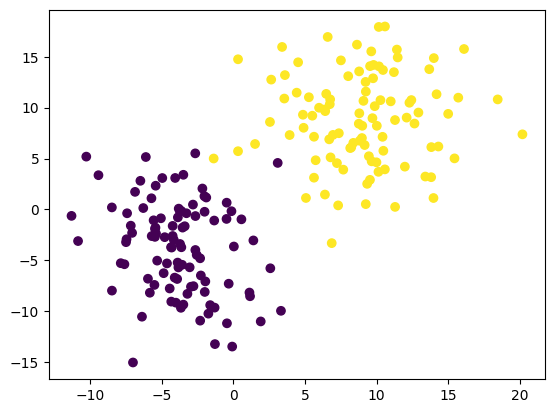

In [2]:
# Generate random data
np.random.seed(124)
X0 = np.random.multivariate_normal([-4,-4], [[10,0], [0,20]], size=100)
y0 = np.zeros(len(X0))
X1 = np.random.multivariate_normal([9,9], [[15,0], [0,20]], size=100)
y1 = np.ones(len(X1))
X = np.concatenate((X0, X1), axis=0)
y = np.concatenate((y0, y1), axis=0)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [3]:
# weights and biases
w = np.array([0.0, 0.0])
b = np.array([0.0,])

# Shuffle the data
np.random.seed(123)
idxs = np.arange(0, len(X), 1)
np.random.shuffle(idxs)
X = X[idxs]
y = y[idxs]

# Normalize the features to zero mean and unit variance
X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-9)

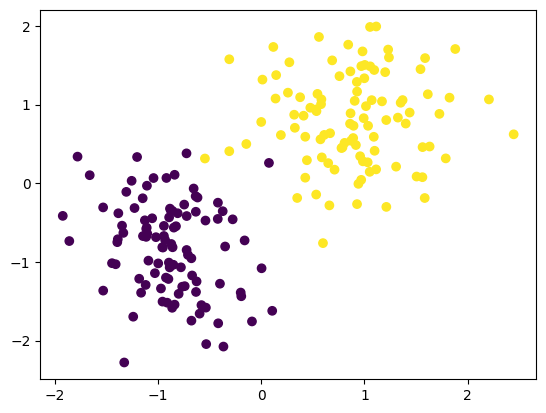

In [4]:
# Plot the normalized data
plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
# Split the data between train and test set
n = int(0.7 * len(X))
X_train, y_train = X[:n], y[:n]
X_test, y_test = X[n:], y[n:]
print(f"Train dataset size is {X_train.shape}")
print(f"Test dataset size is {X_test.shape}")

Train dataset size is (140, 2)
Test dataset size is (60, 2)


In [6]:
# Training
n_epochs = 6
for epoch in range(n_epochs):
    avg_err = 0.0
    for i in range(X_train.shape[0]):
        pred = X_train[i].dot(w) + b
        pred = np.where(pred > 0, 1.0, 0.0)
        err = y_train[i] - pred
        w = w + err * X_train[i]
        b += err
        avg_err += err
        #print(err[0], w)
        #break
    print(f"Epoch: {epoch}, avg_error: {avg_err/X_train.shape[0]}")

Epoch: 0, avg_error: [0.00714286]
Epoch: 1, avg_error: [-0.00714286]
Epoch: 2, avg_error: [0.]
Epoch: 3, avg_error: [0.00714286]
Epoch: 4, avg_error: [0.]
Epoch: 5, avg_error: [0.]


In [7]:
# Model weight params
print(f"Weights: {w}")
print(f"Bias: {b}")

Weights: [1.61935094 1.53738058]
Bias: [1.]


In [8]:
# Evaluation
def eval(X, y, w, b):
    y_pred = X.dot(w) + b
    y_pred = np.int32(y_pred > 0)
    # accuracy
    acc = np.sum(y_pred == y) / len(y) * 100.0
    print(f"Correct preds={np.sum(y_pred == y)}")
    print(f"Accuracy of the model is {acc:.2f}%")

eval(X_train, y_train, w, b)
eval(X_test, y_test, w, b)
y_pred_train = np.int32(X_train.dot(w) + b > 0)
y_pred_test = np.int32(X_test.dot(w) + b > 0)

Correct preds=138
Accuracy of the model is 98.57%
Correct preds=60
Accuracy of the model is 100.00%


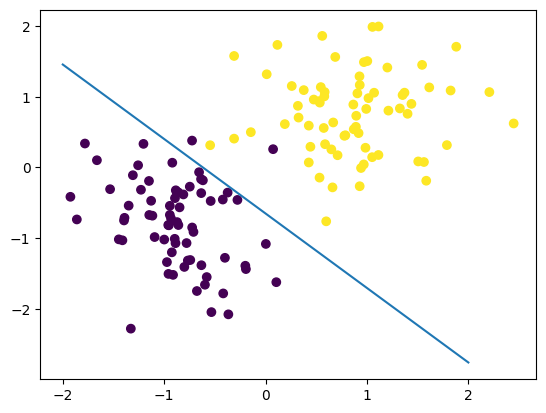

In [9]:
# Plot predictions on train dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
# Draw the decision boundary
# x0*w0 + x1*w1 + b = 0 is the decision boundary
x0_min = -2
x0_max = 2
x1_min = (-(x0_min * w[0]) - b[0]) / w[1]
x1_max = (-(x0_max * w[0]) - b[0]) / w[1]
plt.plot([x0_min, x0_max], [x1_min, x1_max])

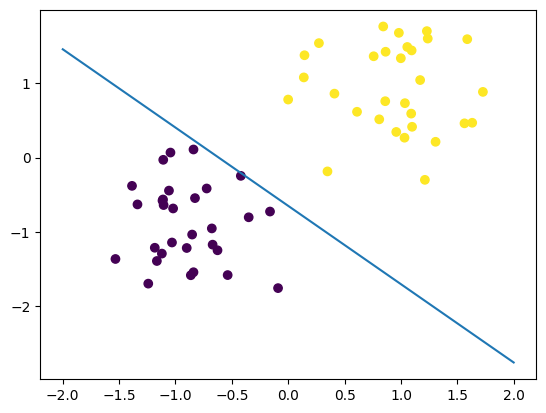

In [10]:
# Plot predictions on test dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
# Draw the decision boundary
# x0*w0 + x1*w1 + b = 0 is the decision boundary
x0_min = -2
x0_max = 2
x1_min = (-(x0_min * w[0]) - b[0]) / w[1]
x1_max = (-(x0_max * w[0]) - b[0]) / w[1]
plt.plot([x0_min, x0_max], [x1_min, x1_max])